In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [3]:
%pwd

'/content/gdrive/My Drive/Kaggle'

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm
import seaborn as sns
from random import randint

In [5]:
data=pd.read_csv("train_2.csv.zip").fillna(0)
data=data.interpolate(method ='linear',limit=1)
data = data.fillna(0)
data.head()


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,46.0,24.0,22.0,22.0,11.0,25.0,45.0,39.0,17.0,18.0,13.0,57.0,18.0,14.0,19.0,39.0,22.0,16.0,28.0,21.0,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,39.0,20.0,31.0,19.0,7.0,11.0,20.0,13.0,16.0,16.0,47.0,21.0,20.0,12.0,13.0,20.0,22.0,20.0,12.0,37.0,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,22.0,8.0,4.0,3.0,1.0,3.0,7.0,3.0,1.0,9.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,2.0,4.0,3.0,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,37.0,14.0,12.0,13.0,11.0,10.0,14.0,15.0,15.0,11.0,19.0,9.0,19.0,8.0,17.0,11.0,18.0,20.0,11.0,11.0,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,39.0,66.0,114.0,19.0,29.0,12.0,11.0,14.0,14.0,63.0,12.0,22.0,14.0,20.0,11.0,23.0,66.0,19.0,23.0,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [6]:
#outlier removal
col=data.columns
for i in tqdm(range(data.shape[0])):
    temp=data.iloc[i].values[1:]
    thres=np.percentile(temp,99.8)
    med=np.median(temp)
    for j in col[1:]:
        if(data.at[i,j]>thres):
            data.at[i,j]=med


100%|██████████| 145063/145063 [14:37<00:00, 165.38it/s]


In [7]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,46.0,24.0,22.0,22.0,11.0,25.0,45.0,39.0,17.0,18.0,13.0,57.0,18.0,14.0,19.0,39.0,22.0,16.0,28.0,21.0,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,39.0,20.0,31.0,19.0,7.0,11.0,20.0,13.0,16.0,16.0,47.0,21.0,20.0,12.0,13.0,20.0,22.0,20.0,12.0,37.0,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,22.0,8.0,4.0,3.0,1.0,3.0,7.0,3.0,1.0,9.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,2.0,4.0,3.0,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,14.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,37.0,14.0,12.0,13.0,11.0,10.0,14.0,15.0,15.0,11.0,19.0,9.0,19.0,8.0,17.0,11.0,18.0,20.0,11.0,11.0,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,39.0,66.0,114.0,19.0,29.0,12.0,11.0,14.0,14.0,63.0,12.0,22.0,14.0,20.0,11.0,23.0,66.0,19.0,23.0,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [8]:
pages=data["Page"]

In [ ]:
Page_name=data["Page"]

In [9]:
#code for adding language,project,accesstype,agent feature  for last 31 days.
project=[]
access=[]
agent=[]
language=[]
for i in range(len(pages)):
  temp=pages[i].split(".")
  for j in range(15):
    project.append(temp[-2])
  k=temp[-3].split("_")
  for j in range(15):
    language.append(k[-1])
  t=temp[-1].split("_")
  for j in range(15):
    access.append(t[1])
    agent.append(t[2])

In [10]:
#weekly trend that was found in auto correlation plot.
weekly_trend=[]
for i in tqdm(range(data.shape[0])):
    temp=data.iloc[i].values
    weekly_temp=[]
    for j in range(789,804):
        weekly_temp.append(temp[j-7])
    weekly_trend.extend(weekly_temp) 

100%|██████████| 145063/145063 [01:30<00:00, 1595.14it/s]


In [11]:
lag_14_feature=[]
for i in tqdm(range(data.shape[0])):
    temp=data.iloc[i].values
    weekly_temp=[]
    for j in range(789,804):
        weekly_temp.append(temp[j-14])
    lag_14_feature.extend(weekly_temp) 

100%|██████████| 145063/145063 [01:29<00:00, 1617.38it/s]


In [12]:
lag_21_feature=[]
for i in tqdm(range(data.shape[0])):
    temp=data.iloc[i].values
    weekly_temp=[]
    for j in range(789,804):
        weekly_temp.append(temp[j-14])
    lag_21_feature.extend(weekly_temp) 

100%|██████████| 145063/145063 [01:29<00:00, 1624.03it/s]


In [13]:
monthly_trend=[]
for i in tqdm(range(data.shape[0])):
    temp=data.iloc[i].values
    monthly_temp=[]
    for j in range(789,804):
      monthly_temp_m=[]
      monthly_temp_m.append(np.median([temp[j-30],temp[j-31]]))
      monthly_temp_m.append(np.median([temp[j-60],temp[j-61]]))
      monthly_temp_m.append(np.median([temp[j-90],temp[j-91]]))
      monthly_temp.append(np.mean(monthly_temp_m))
    monthly_trend.extend(monthly_temp) 

100%|██████████| 145063/145063 [09:10<00:00, 263.73it/s]


In [14]:
yearly_trend=[]
for i in tqdm(range(data.shape[0])):
    temp=data.iloc[i].values
    yearly_temp=[]
    for j in range(789,804):   
      yearly_temp_m=[]
      yearly_temp_m.append(np.median([temp[j-364],temp[j-365],temp[j-366]]))
      yearly_temp_m.append(np.median([temp[j-729],temp[j-730],temp[j-731]]))
      yearly_temp.append(np.mean(yearly_temp_m))
    yearly_trend.extend(yearly_temp)

100%|██████████| 145063/145063 [06:56<00:00, 348.23it/s]


In [15]:

quarterly_trend=[]
for i in tqdm(range(data.shape[0])):
    temp=data.iloc[i].values
    quarterly_temp=[]
    for j in range(789,804):
      quarterly_temp_m=[]
      quarterly_temp_m.append(np.median([temp[j-119],temp[j-120],temp[j-121]]))
      quarterly_temp_m.append(np.median([temp[j-229],temp[j-230],temp[j-231]]))
      quarterly_temp_m.append(np.median([temp[j-339],temp[j-340],temp[j-341]]))
      quarterly_temp.append(np.mean(quarterly_temp_m))
    quarterly_trend.extend(quarterly_temp)

100%|██████████| 145063/145063 [08:51<00:00, 272.78it/s]


In [16]:
y=[]
for i in (range(data.shape[0])):
    temp=data.iloc[i].values
    for j in range(789,804):
        y.append(temp[j]) 

In [17]:
from sklearn.preprocessing import OneHotEncoder,normalize
enc_access= OneHotEncoder(sparse=False)
access_ohe=enc_access.fit_transform(np.array(access).reshape(-1,1))

In [18]:
enc_project= OneHotEncoder(sparse=False)
project_ohe=enc_project.fit_transform(np.array(project).reshape(-1,1))

In [19]:
enc_agent= OneHotEncoder(sparse=False)
agent_ohe=enc_agent.fit_transform(np.array(agent).reshape(-1,1))

In [20]:
enc_language= OneHotEncoder(sparse=False)
language_ohe=enc_language.fit_transform(np.array(language).reshape(-1,1))

In [21]:
#weekday of each day.
import datetime
l=len(data.columns)
weekday=[]
for i in range(data.shape[0]):
    week=[]
    for i in (data.columns[789:804]):
        temp=i.split('-')
        my_date=datetime.date(int(temp[0]),int(temp[1]),int(temp[2]))
        week.append(my_date.weekday())
    weekday.extend(week)

In [22]:
enc_weekday= OneHotEncoder(sparse=False)
weekday_ohe=enc_weekday.fit_transform(np.array(weekday).reshape(-1,1))

In [23]:
weekday_ohe.shape

(2175945, 7)

In [24]:
rolling_median_7=[]
rolling_mean_7=[]
rolling_std_7=[]
rolling_max_7=[]
rolling_min_7=[]
for i in tqdm(range(data.shape[0])):
  temp=data.iloc[i].values[782:804]
  k=pd.DataFrame(temp)
  k["rolling_median_7"]=k.rolling(7).median()
  rolling_median_7.append(k["rolling_median_7"].values[7:])
  k=pd.DataFrame(temp)
  k["rolling_mean_7"]=k.rolling(7,min_periods=1).mean()
  rolling_mean_7.append(k["rolling_mean_7"].values[7:])
  k=pd.DataFrame(temp)
  k["rolling_std_7"]=k.rolling(7,min_periods=1).std()
  rolling_std_7.append(k["rolling_std_7"].values[7:])
  k=pd.DataFrame(temp)
  k["rolling_max_7"]=k.rolling(7,min_periods=1).max()
  rolling_max_7.append(k["rolling_max_7"].values[7:])
  k=pd.DataFrame(temp)
  k["rolling_min_7"]=k.rolling(7,min_periods=1).min()
  rolling_min_7.append(k["rolling_min_7"].values[7:])

100%|██████████| 145063/145063 [23:28<00:00, 103.01it/s]


In [25]:
rolling_median_3=[]
rolling_mean_3=[]
rolling_std_3=[]
rolling_max_3=[]
rolling_min_3=[]
for i in tqdm(range(data.shape[0])):
  temp=data.iloc[i].values[786:804]
  k=pd.DataFrame(temp)
  k["rolling_median_3"]=k.rolling(3).median()
  rolling_median_3.append(k["rolling_median_3"].values[3:])
  k=pd.DataFrame(temp)
  k["rolling_mean_3"]=k.rolling(3,min_periods=1).mean()
  rolling_mean_3.append(k["rolling_mean_3"].values[3:])
  k=pd.DataFrame(temp)
  k["rolling_std_3"]=k.rolling(3,min_periods=1).std()
  rolling_std_3.append(k["rolling_std_3"].values[3:])
  k=pd.DataFrame(temp)
  k["rolling_max_3"]=k.rolling(3,min_periods=1).max()
  rolling_max_3.append(k["rolling_max_3"].values[3:])
  k=pd.DataFrame(temp)
  k["rolling_min_3"]=k.rolling(3,min_periods=1).min()
  rolling_min_3.append(k["rolling_min_3"].values[3:])

100%|██████████| 145063/145063 [23:39<00:00, 102.16it/s]


In [28]:
weekly_trend=normalize(np.array(weekly_trend).reshape(-1,1),axis=0)
lag_14_feature=normalize(np.array(lag_14_feature).reshape(-1,1),axis=0)
lag_21_feature=normalize(np.array(lag_21_feature).reshape(-1,1),axis=0)
monthly_trend=normalize(np.array(monthly_trend).reshape(-1,1),axis=0)
quarterly_trend=normalize(np.array(quarterly_trend).reshape(-1,1),axis=0)
yearly_trend=normalize(np.array(yearly_trend).reshape(-1,1),axis=0)
rolling_median_7=normalize(np.array(rolling_median_7).reshape(-1,1),axis=0)
rolling_mean_7=normalize(np.array(rolling_mean_7).reshape(-1,1),axis=0)
rolling_std_7=normalize(np.array(rolling_std_7).reshape(-1,1),axis=0)
rolling_max_7=normalize(np.array(rolling_max_7).reshape(-1,1),axis=0)
rolling_min_7=normalize(np.array(rolling_min_7).reshape(-1,1),axis=0)
rolling_median_3=normalize(np.array(rolling_median_3).reshape(-1,1),axis=0)
rolling_mean_3=normalize(np.array(rolling_mean_3).reshape(-1,1),axis=0)
rolling_std_3=normalize(np.array(rolling_std_3).reshape(-1,1),axis=0)
rolling_max_3=normalize(np.array(rolling_max_3).reshape(-1,1),axis=0)
rolling_min_3=normalize(np.array(rolling_min_3).reshape(-1,1),axis=0)
y_value=np.array(y)

In [29]:
print(quarterly_trend.shape)
print(monthly_trend.shape)
print(yearly_trend.shape)
print(weekly_trend.shape)
print(agent_ohe.shape)
print(project_ohe.shape)
print(agent_ohe.shape)
print(language_ohe.shape)
#print(median.shape)
print(weekday_ohe.shape)
print(y_value.shape)

(2175945, 1)
(2175945, 1)
(2175945, 1)
(2175945, 1)
(2175945, 2)
(2175945, 3)
(2175945, 2)
(2175945, 9)
(2175945, 7)
(2175945,)


In [30]:
X=np.column_stack((weekly_trend,lag_14_feature,lag_21_feature,quarterly_trend,monthly_trend,yearly_trend,language_ohe,agent_ohe,project_ohe,access_ohe,weekday_ohe,rolling_median_7,rolling_mean_7,rolling_std_7,rolling_max_7,rolling_min_7,rolling_median_3,rolling_mean_3,rolling_std_3,rolling_max_3,rolling_min_3))

In [31]:
X.shape

(2175945, 40)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_value, test_size=0.33, random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1457883, 40)
(718062, 40)
(1457883,)
(718062,)


In [34]:
def smape(A, F):
    tmp = 2 * np.abs(F - A) / (np.abs(A) + np.abs(F))
    len_ = np.count_nonzero(~np.isnan(tmp))
    return 1 / len_ * np.nansum(tmp)

<h1>Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
pred=reg.predict(X_test)

In [36]:
smape_loss=smape(y_test,pred)
print('smape loss in LinearRegression is: ',smape_loss)

smape loss in LinearRegression is:  0.7854155326031005


<h1>GBDT<h1>

In [37]:
#hyper parameter tuning
from xgboost import XGBRegressor
max_depth=[9,11,13,15]
n_estimators=[200,250,300,500]
loss=9999999
for i in tqdm(max_depth):
  for j in n_estimators:
    reg=XGBRegressor(max_depth=i,n_jobs=-1,n_estimators=j,tree_method="gpu_hist")
    reg.fit(X_train,y_train)
    pred=reg.predict(X_test)
    score=smape(y_test,pred)
    print("max_depth=",i)
    print("n_estimator=",j)
    print("smape=",score)
    print("-"*50)
    if score<loss:
      loss=score
      d=i
      n=j
    print("best parameters till now")
    print("max depth=",d,",n_estimator=",n,",loss=",loss)
    print("-"*50)

  0%|          | 0/4 [00:00<?, ?it/s]

[07:15:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
max_depth= 9
n_estimator= 200
smape= 0.2773226880660799
--------------------------------------------------
best parameters till now
max depth= 9 ,n_estimator= 200 ,loss= 0.2773226880660799
--------------------------------------------------
[07:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
max_depth= 9
n_estimator= 250
smape= 0.276628549906074
--------------------------------------------------
best parameters till now
max depth= 9 ,n_estimator= 250 ,loss= 0.276628549906074
--------------------------------------------------
[07:16:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
max_depth= 9
n_estimator= 300
smape= 0.275769648381841
--------------------------------------------------
best parameters till now
max depth=

 25%|██▌       | 1/4 [01:44<05:12, 104.28s/it]

max_depth= 9
n_estimator= 500
smape= 0.2717309207112899
--------------------------------------------------
best parameters till now
max depth= 9 ,n_estimator= 500 ,loss= 0.2717309207112899
--------------------------------------------------
[07:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
max_depth= 11
n_estimator= 200
smape= 0.25831428611505136
--------------------------------------------------
best parameters till now
max depth= 11 ,n_estimator= 200 ,loss= 0.25831428611505136
--------------------------------------------------
[07:17:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
max_depth= 11
n_estimator= 250
smape= 0.25657619827607536
--------------------------------------------------
best parameters till now
max depth= 11 ,n_estimator= 250 ,loss= 0.25657619827607536
--------------------------------------------------
[07:18:17] WARNING

 50%|█████     | 2/4 [04:22<04:00, 120.46s/it]

max_depth= 11
n_estimator= 500
smape= 0.25460987779367805
--------------------------------------------------
best parameters till now
max depth= 11 ,n_estimator= 500 ,loss= 0.25460987779367805
--------------------------------------------------
[07:19:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
max_depth= 13
n_estimator= 200
smape= 0.25149677195840847
--------------------------------------------------
best parameters till now
max depth= 13 ,n_estimator= 200 ,loss= 0.25149677195840847
--------------------------------------------------
[07:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
max_depth= 13
n_estimator= 250
smape= 0.25042475574369905
--------------------------------------------------
best parameters till now
max depth= 13 ,n_estimator= 250 ,loss= 0.25042475574369905
--------------------------------------------------
[07:21:40] WAR

 75%|███████▌  | 3/4 [09:05<02:49, 169.08s/it]

max_depth= 13
n_estimator= 500
smape= 0.24860083910580702
--------------------------------------------------
best parameters till now
max depth= 13 ,n_estimator= 500 ,loss= 0.24860083910580702
--------------------------------------------------
[07:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
max_depth= 15
n_estimator= 200
smape= 0.24779484443431846
--------------------------------------------------
best parameters till now
max depth= 15 ,n_estimator= 200 ,loss= 0.24779484443431846
--------------------------------------------------
[07:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
max_depth= 15
n_estimator= 250
smape= 0.24702215016138038
--------------------------------------------------
best parameters till now
max depth= 15 ,n_estimator= 250 ,loss= 0.24702215016138038
--------------------------------------------------
[07:28:00] WAR

100%|██████████| 4/4 [18:33<00:00, 278.32s/it]

max_depth= 15
n_estimator= 500
smape= 0.24457808823213364
--------------------------------------------------
best parameters till now
max depth= 15 ,n_estimator= 500 ,loss= 0.24457808823213364
--------------------------------------------------


In [ ]:
from xgboost import XGBRegressor

In [38]:
from xgboost import XGBRegressor
reg=XGBRegressor(max_depth=15,n_jobs=-1,n_estimators=300,tree_method="gpu_hist")
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
score=smape(y_test,pred)

[07:34:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [39]:
print(score)

0.24663706187287127


<h1>note</h1>

1. the reason for not trying more ML models such as randomforest,decision tree,svm regressor is as ML models are purely dependent on feature engineering and as we are predicting for next 62 days in future we have to use the predicted data for feature engineering.so its useless to use ML moels as the error is increasing exponetially.

In [ ]:
new_data=data.copy()

In [ ]:
#preparing prediction data for generating submission file
import tqdm.notebook as tq
date=datetime.date(2017,9,11)
pred=np.zeros((64,145063))
for j in tq.tqdm(range(64)):
  quarterly_trend=[]
  quarterly_temp_m=[]
  monthly_temp_m=[]
  monthly_trend=[]
  yearly_trend=[]
  yearly_temp_m=[]
  weekly_trend=[]
  project=[]
  access=[]
  agent=[]
  lag_14_feature=[]
  lag_21_feature=[]
  language=[]
  rolling_median_7=[]
  rolling_mean_7=[]
  rolling_std_7=[]
  rolling_max_7=[]
  rolling_min_7=[]
  rolling_median_3=[]
  rolling_mean_3=[]
  rolling_std_3=[]
  rolling_max_3=[]
  rolling_min_3=[]
  current_date=date.weekday()
  current_date=np.tile(current_date,(data.shape[0],1))
  weekday_ohe=enc_weekday.transform(np.array([current_date]).reshape(-1,1))

  for i in (range(data.shape[0])):
      temp=pages[i].split(".")
      project.append(temp[-2])
      k=temp[-3].split("_")
      language.append(k[-1])
      t=temp[-1].split("_")
      access.append(t[1])
      agent.append(t[2])
      #weekly trend
      temp=new.iloc[i].values
      weekly_trend.append(temp[-7])
      #quarterly trend
      quarterly_temp_m.append(np.median([temp[-119],temp[-120],temp[-121]]))
      quarterly_temp_m.append(np.median([temp[-229],temp[-230],temp[-231]]))
      quarterly_temp_m.append(np.median([temp[-339],temp[-340],temp[-341]]))
      quarterly_trend.append(np.mean(quarterly_temp_m))
      monthly_temp_m.append(np.median([temp[-30],temp[-31]]))
      monthly_temp_m.append(np.median([temp[-60],temp[-61]]))
      monthly_temp_m.append(np.median([temp[-90],temp[-91]]))
      monthly_trend.append(np.mean(monthly_temp_m))
      yearly_temp_m.append(np.median([temp[-364],temp[-365],temp[-366]]))
      yearly_temp_m.append(np.median([temp[-729],temp[-730],temp[-731]]))
      yearly_temp.append(np.mean(yearly_temp_m))
      lag_14_feature.append(temp[-14])
      lag_21_feature.append(temp[-21])
      t=temp[-7:]
      rolling_median_7.append(np.median(t))
      rolling_mean_7.append(np.mean(t))
      rolling_std_7.append(np.std(t))
      rolling_max_7.append(np.max(t))
      rolling_min_7.append(np.min(t))
      t=temp[-3:]
      rolling_median_3.append(np.median(t))
      rolling_mean_3.append(np.mean(t))
      rolling_std_3.append(np.std(t))
      rolling_max_3.append(np.max(t))
      rolling_min_3.append(np.min(t))
  access_ohe=enc_access.transform(np.array(access).reshape(-1,1))
  project_ohe=enc_project.transform(np.array(project).reshape(-1,1))
  agent_ohe=enc_agent.transform(np.array(agent).reshape(-1,1))
  language_ohe=enc_language.transform(np.array(language).reshape(-1,1))
  weekly_trend=normalize(np.array(weekly_trend).reshape(-1,1),axis=0)
  quarterly_trend_120=normalize(np.array(quarterly_trend_120).reshape(-1,1),axis=0)
  quarterly_trend_230=normalize(np.array(quarterly_trend_230).reshape(-1,1),axis=0)
  quarterly_trend_340=normalize(np.array(quarterly_trend_340).reshape(-1,1),axis=0)
  lag_14_feature=normalize(np.array(lag_14_feature).reshape(-1,1),axis=0)
  lag_21_feature=normalize(np.array(lag_21_feature).reshape(-1,1),axis=0)
  rolling_median_7=normalize(np.array(rolling_median_7).reshape(-1,1),axis=0)
  rolling_mean_7=normalize(np.array(rolling_mean_7).reshape(-1,1),axis=0)
  rolling_std_7=normalize(np.array(rolling_std_7).reshape(-1,1),axis=0)
  rolling_max_7=normalize(np.array(rolling_max_7).reshape(-1,1),axis=0)
  rolling_min_7=normalize(np.array(rolling_min_7).reshape(-1,1),axis=0)
  rolling_median_3=normalize(np.array(rolling_median_3).reshape(-1,1),axis=0)
  rolling_mean_3=normalize(np.array(rolling_mean_3).reshape(-1,1),axis=0)
  rolling_std_3=normalize(np.array(rolling_std_3).reshape(-1,1),axis=0)
  rolling_max_3=normalize(np.array(rolling_max_3).reshape(-1,1),axis=0)
  rolling_min_3=normalize(np.array(rolling_min_3).reshape(-1,1),axis=0)
  X_test=np.column_stack((weekly_trend,lag_14_feature,lag_21_feature,quarterly_trend,monthly_trend,yearly_trend,language_ohe,agent_ohe,project_ohe,access_ohe,weekday_ohe,rolling_median_7,rolling_mean_7,rolling_std_7,rolling_max_7,rolling_min_7,rolling_median_3,rolling_mean_3,rolling_std_3,rolling_max_3,rolling_min_3))
  y_pred=reg.predict(X_test)
  new_data[str(date)]=pred_value
  date += datetime.timedelta(days=1)
  

In [ ]:
new_data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2017-10-05,2017-10-06,2017-10-07,2017-10-08,2017-10-09,2017-10-10,2017-10-11,2017-10-12,2017-10-13,2017-10-14,2017-10-15,2017-10-16,2017-10-17,2017-10-18,2017-10-19,2017-10-20,2017-10-21,2017-10-22,2017-10-23,2017-10-24,2017-10-25,2017-10-26,2017-10-27,2017-10-28,2017-10-29,2017-10-30,2017-10-31,2017-11-01,2017-11-02,2017-11-03,2017-11-04,2017-11-05,2017-11-06,2017-11-07,2017-11-08,2017-11-09,2017-11-10,2017-11-11,2017-11-12,2017-11-13
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,53157.238281,48551.339844,48095.140625,51316.437500,56169.386719,57802.000000,49373.394531,53821.445312,52565.902344,49505.187500,52136.089844,53735.433594,53429.273438,49604.640625,51847.917969,49896.531250,48621.121094,51883.683594,53224.292969,52523.593750,48954.261719,52185.531250,49583.687500,49156.535156,51775.097656,53777.429688,53960.617188,49543.871094,52239.859375,49707.632812,48710.203125,52124.242188,54242.093750,52820.363281,52074.535156,52174.695312,51121.875000,48893.246094,54403.898438,54835.027344
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,54435.378906,50110.781250,47672.019531,51590.500000,54874.761719,53851.289062,49802.054688,55084.933594,51295.109375,49535.457031,51476.578125,53688.242188,56224.648438,48640.468750,52462.769531,50862.777344,49679.347656,48533.382812,56536.035156,50827.734375,46087.085938,58726.675781,50871.847656,47310.390625,56857.750000,57980.398438,59316.980469,59390.062500,58101.226562,57958.578125,53179.558594,56911.132812,54698.117188,58213.031250,54066.875000,54325.515625,50844.160156,49922.589844,51557.078125,53051.683594
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,3031.782715,3050.846680,2998.397705,3473.695312,3857.564209,4229.821289,4478.077148,5084.891113,4955.820801,4928.448242,5474.054199,5960.908203,5834.079590,6619.153809,7197.038574,7417.282227,7585.860840,8340.449219,9463.821289,9992.162109,10632.555664,13945.476562,13464.224609,17904.957031,19766.322266,26520.503906,25131.654297,25565.726562,33599.617188,34929.808594,36870.203125,42885.902344,45481.125000,45933.855469,48131.585938,52441.445312,50806.617188,48671.089844,51059.320312,53472.882812
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,19786.740234,22497.496094,22494.070312,23791.318359,25772.185547,26230.021484,25311.914062,32734.273438,34060.539062,36744.910156,41502.042969,44708.285156,47610.546875,48712.742188,50989.128906,53074.671875,48041.605469,51115.679688,54125.027344,52727.886719,47902.421875,53667.117188,51944.179688,48727.417969,51264.531250,52914.070312,52812.847656,49467.421875,51916.449219,49661.718750,48430.253906,53584.398438,54606.027344,52956.722656,49910.210938,52150.050781,50058.792969,49021.929688,52269.183594,54516.679688
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
key=pd.read_csv('/content/gdrive/MyDrive/Kaggle/key_2.csv.zip')
submission=pd.read_csv('/content/gdrive/MyDrive/Kaggle/sample_submission_2.csv.zip')

In [ ]:
key1.head()

,Page,Id,Visits
0,007_スペクター_ja.wikipedia.org_all-access_all-agen...,0b293039387a,0
1,007_スペクター_ja.wikipedia.org_all-access_all-agen...,7114389dd824,0
2,007_スペクター_ja.wikipedia.org_all-access_all-agen...,057b02ff1f09,0
3,007_スペクター_ja.wikipedia.org_all-access_all-agen...,bd2aca21caa3,0
4,007_スペクター_ja.wikipedia.org_all-access_all-agen...,c0effb42cdd5,0


In [ ]:
id=key['Page'].values
visits={} # In this we will store our predictions, keys are the name of the page and values are the predictions
for i in range(data.shape[0]):
    date = datetime.date(2017,9,13)
    for j in range(62):
        name=pages[i] + '_' + str(date)
        visits[name]=new_data.at[i,str(date)]
        date += datetime.timedelta(days=1)

In [ ]:
for i in range(len(id)):
    submission.at[i,'Visits']=visits[id[i]]

In [ ]:
submission.to_csv('gbdt.csv',index=False)

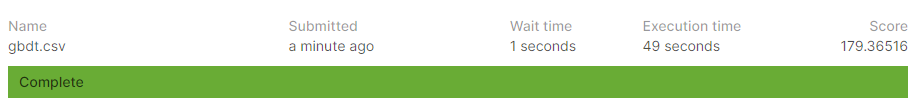

<h1>LSTM+CNN</h1>

In [ ]:
indices = np.random.permutation(data.shape[0])
new_index=indices[:int(0.5*data.shape[0])]

In [ ]:
project=[]
access=[]
agent=[]
language=[]
for i in idx:
  temp=pages[i].split(".")
  project.append(temp[-2])
  k=temp[-3].split("_")
  if k[-1]=="commons" or k[-1]=="www":
    language.append("media")
  else:
    language.append(k[-1])
  t=temp[-1].split("_")
  access.append(t[1])
  agent.append(t[2])

In [ ]:
x_train=[]
y_train=[]
for i in (new_index):
    k = np.array(data.iloc[i].values[-264:], dtype=int)
    temp=np.log1p(k)
    x_train.append(temp[:200]) 
    y_train.append(temp[200:264])

In [ ]:
len(x_train)

72531

In [ ]:
x=np.array(x_train).reshape(len(new_index),200,1)
y=np.array(y_train).reshape(len(new_index),64)

In [ ]:
y.shape

(72531, 64)

In [ ]:
x_train=x[:50000]
y_train=y[:50000]
x_test=x[50000:]
y_test=y[50000:]

In [ ]:
#label encoding is for lstm+embedding layers
from sklearn.preprocessing import LabelEncoder,normalize
enc_access= LabelEncoder()
access_ohe=enc_access.fit_transform(np.array(access))
enc_project= LabelEncoder()
project_ohe=enc_project.fit_transform(np.array(project))
enc_agent=LabelEncoder()
agent_ohe=enc_agent.fit_transform(np.array(agent))
enc_language= LabelEncoder()
language_ohe=enc_language.fit_transform(np.array(language))

In [ ]:
access_train=access_ohe[:50000] # Splitting into train ans test
access_test=access_ohe[50000:]

lang_train=language_ohe[:50000]
lang_test=language_ohe[50000:]

agent_train=agent_ohe[:50000]
agent_test=agent_ohe[50000:]

project_train=project_ohe[:80000]
project_test=project_ohe[80000:]

In [ ]:
lang_train.shape

(50000,)

In [ ]:
access_train=access_train.reshape(len(access_train),1)
access_test=access_test.reshape(len(access_test),1)
lang_train=lang_train.reshape(len(lang_train),1)
lang_test=lang_test.reshape(len(lang_test),1)
agent_train=agent_train.reshape(len(agent_train),1)
agent_test=agent_test.reshape(len(agent_test),1)
project_train=project_train.reshape(len(project_train),1)
project_test=project_test.reshape(len(project_test),1)

In [ ]:
#one hot encoding is for lstm+cnn model
from sklearn.preprocessing import OneHotEncoder,normalize
enc_access= OneHotEncoder(sparse=False)
access_ohe=enc_access.fit_transform(np.array(access).reshape(-1,1))
enc_project= OneHotEncoder(sparse=False)
project_ohe=enc_project.fit_transform(np.array(project).reshape(-1,1))
enc_agent= OneHotEncoder(sparse=False)
agent_ohe=enc_agent.fit_transform(np.array(agent).reshape(-1,1))
enc_language= OneHotEncoder(sparse=False)
language_ohe=enc_language.fit_transform(np.array(language).reshape(-1,1))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input,Activation,LSTM,Flatten,Conv1D,Conv2D,Embedding,Concatenate,Dropout,BatchNormalization,RepeatVector,TimeDistributed,concatenate

In [ ]:
#data stacking for lstm+cnn model
x_tr=np.hstack((access_train,lang_train,agent_train,project_train))
x_te=np.hstack((access_test,lang_test,agent_test,project_test))

In [ ]:
x_tr.shape

(80000, 16, 1)

In [ ]:
x_te.shape

(28797, 16, 1)

In [ ]:
#reshaping the data for feeding in to model
x_tr=np.expand_dims(x_tr,axis=2)
x_te=np.expand_dims(x_te,axis=2)

In [ ]:
from keras import regularizers 
input_layer=Input(shape=(x_train.shape[1],1))
x=LSTM(100)(input_layer)
flatten_1=Flatten()(x)
input_layer_2=Input(shape=(16,1))
con1D_N=Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer_2)
con1D_M=Conv1D(filters=32 ,kernel_size=2, activation='relu')(con1D_N)
con1D_O=Conv1D(filters=16 ,kernel_size=2, activation='relu')(con1D_M)

flatten_2=Flatten()(con1D_O)
concate__layer=concatenate([flatten_1,flatten_2])
dense_1 = Dense(1024,activation="relu")(concate__layer)
dense_2 = Dense(512,activation="relu")(dense_1)
dense_3=Dense(256,activation="relu")(dense_2)
output=Dense(64)(dense_3)
model_3 = Model(inputs=[input_layer,input_layer_2],outputs=output)
model_3.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 16, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 15, 64)       192         input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 300, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 14, 32)       4128        conv1d_3[0][0]                   
____________________________________________________________________________________________

In [ ]:
optimizer=tf.keras.optimizers.Adam()
model_3.compile(optimizer=optimizer, loss="mae")
model_3.fit([x_train,x_tr], y_train, validation_data=([x_test,x_te],y_test),epochs=70, batch_size=64)

Epoch 1/70
1250/1250 [==============================] - 29s 17ms/step - loss: 0.5888 - val_loss: 0.3751
Epoch 2/70
1250/1250 [==============================] - 21s 17ms/step - loss: 0.3803 - val_loss: 0.3909
Epoch 3/70
1250/1250 [==============================] - 21s 17ms/step - loss: 0.3605 - val_loss: 0.3456
Epoch 4/70
1250/1250 [==============================] - 21s 17ms/step - loss: 0.3506 - val_loss: 0.3713
Epoch 5/70
1250/1250 [==============================] - 21s 17ms/step - loss: 0.3470 - val_loss: 0.3447
Epoch 6/70
1250/1250 [==============================] - 21s 17ms/step - loss: 0.3451 - val_loss: 0.3402
Epoch 7/70
1250/1250 [==============================] - 21s 17ms/step - loss: 0.3408 - val_loss: 0.3468
Epoch 8/70
1250/1250 [==============================] - 21s 17ms/step - loss: 0.3404 - val_loss: 0.3418
Epoch 9/70
1250/1250 [==============================] - 21s 17ms/step - loss: 0.3379 - val_loss: 0.3387
Epoch 10/70
1250/1250 [==============================] - 21s 17m

KeyboardInterrupt: ignored

In [ ]:
key=pd.read_csv('/content/gdrive/MyDrive/Kaggle/key_2.csv.zip')
submission=pd.read_csv('/content/gdrive/MyDrive/Kaggle/sample_submission_2.csv.zip')

In [ ]:
x_pred=[]
for i in tqdm(range(data.shape[0])):
    k = np.array(data.iloc[i].values[-200:], dtype=int)
    temp=np.log1p(k)
    x_pred.append(temp)

In [ ]:
project=[]
access=[]
agent=[]
language=[]
for i in range(len(pages)):
  temp=pages[i].split(".")
  project.append(temp[-2])
  k=temp[-3].split("_")
  if k[-1]=="commons" or k[-1]=="www":
    language.append("media")
  else:
    language.append(k[-1])
  t=temp[-1].split("_")
  access.append(t[1])
  agent.append(t[2])

In [ ]:
from sklearn.preprocessing import OneHotEncoder,normalize
enc_access= OneHotEncoder(sparse=False)
access_ohe_test=enc_access.fit_transform(np.array(access).reshape(-1,1))
enc_project= OneHotEncoder(sparse=False)
project_ohe_test=enc_project.fit_transform(np.array(project).reshape(-1,1))
enc_agent= OneHotEncoder(sparse=False)
agent_ohe_test=enc_agent.fit_transform(np.array(agent).reshape(-1,1))
enc_language= OneHotEncoder(sparse=False)
language_ohe_test=enc_language.fit_transform(np.array(language).reshape(-1,1))

In [ ]:
x_pred=np.array(x_pred).reshape(data.shape[0],200,1)

In [ ]:
from scipy.sparse import hstack
x_pred=np.hstack((access_ohe_test,language_ohe_test,agent_ohe_test,project_ohe_test))
x_pred=np.expand_dims(x_tr,axis=2)


In [ ]:
pred=model_3.predict([x_pred,x_tr])

In [ ]:
import datetime
id=key['Page'].values
visits={}
for i in tqdm(range(data.shape[0])):
    date = datetime.date(2017,9,13)
    for j in range(62):
        name=pages[i] + '_' + str(date)
        visits[name]=pred[i][j]
        date += datetime.timedelta(days=1)

In [ ]:
for i in tqdm(range(len(id))):
    submission.at[i,'Visits']=visits[id[i]]

In [ ]:
submission.to_csv('lstm_4.csv',index=False)

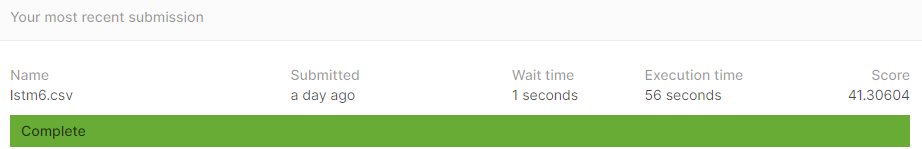

<h1>lstm+embedding </h1>

In [ ]:
from keras import regularizers 
input_layer=Input(shape=(x_train.shape[1],x_train.shape[2]))
x=LSTM(100)(input_layer)
input_layer1=Input(shape=(access_train.shape[1],))
x1=Embedding(input_dim=3,output_dim=3)(input_layer1)
x1=Flatten()(x1)
input_layer2=Input(shape=(lang_train.shape[1],))
x2=Embedding(input_dim=9,output_dim=9)(input_layer2)
x2=Flatten()(x2)
input_layer3=Input(shape=(agent_train.shape[1],))
x3=Embedding(input_dim=2,output_dim=2)(input_layer3)
x3=Flatten()(x3)
input_layer4=Input(shape=(project_train.shape[1],))
concat=Concatenate()([x,x1,x2,x3])
d2=Dense(256,activation='relu')(concat)
d3=Dense(128,activation='relu')(d2)
output=Dense(64)(d3)
model=Model(inputs=[input_layer,input_layer1,input_layer2,input_layer3],outputs=output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 200, 1)]     0                                            
____________________________________________________________________________________________

In [ ]:
optimizer=tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss="mae")
model.fit([x_train,access_train,lang_train,agent_train], y_train, validation_data=([x_test,access_test,lang_test,agent_test],y_test),epochs=80, batch_size=64)

Epoch 1/80
782/782 [==============================] - 18s 14ms/step - loss: 0.8131 - val_loss: 0.3772
Epoch 2/80
782/782 [==============================] - 10s 13ms/step - loss: 0.3810 - val_loss: 0.3657
Epoch 3/80
782/782 [==============================] - 10s 13ms/step - loss: 0.3643 - val_loss: 0.3518
Epoch 4/80
782/782 [==============================] - 10s 13ms/step - loss: 0.3516 - val_loss: 0.3457
Epoch 5/80
782/782 [==============================] - 10s 13ms/step - loss: 0.3484 - val_loss: 0.3443
Epoch 6/80
782/782 [==============================] - 10s 13ms/step - loss: 0.3470 - val_loss: 0.3431
Epoch 7/80
782/782 [==============================] - 10s 13ms/step - loss: 0.3448 - val_loss: 0.3576
Epoch 8/80
782/782 [==============================] - 11s 14ms/step - loss: 0.3449 - val_loss: 0.3372
Epoch 9/80
782/782 [==============================] - 10s 13ms/step - loss: 0.3419 - val_loss: 0.3403
Epoch 10/80
782/782 [==============================] - 10s 13ms/step - loss: 0.340

In [ ]:
key=pd.read_csv('/content/gdrive/MyDrive/Kaggle/key_2.csv.zip')
submission=pd.read_csv('/content/gdrive/MyDrive/Kaggle/sample_submission_2.csv.zip')

In [ ]:
x_pred=[]
for i in tqdm(range(data.shape[0])):
    k = np.array(data.iloc[i].values[-200:], dtype=int)
    temp=np.log1p(k)
    x_pred.append(temp)

100%|██████████| 145063/145063 [01:09<00:00, 2093.29it/s]


In [ ]:
project=[]
access=[]
agent=[]
language=[]
for i in range(len(pages)):
  temp=pages[i].split(".")
  project.append(temp[-2])
  k=temp[-3].split("_")
  if k[-1]=="commons" or k[-1]=="www":
    language.append("media")
  else:
    language.append(k[-1])
  t=temp[-1].split("_")
  access.append(t[1])
  agent.append(t[2])

In [ ]:
from sklearn.preprocessing import LabelEncoder,normalize
enc_access= LabelEncoder()
access_ohe_test=enc_access.transform(np.array(access))
enc_project= LabelEncoder()
project_ohe_test=enc_project.transform(np.array(project))
enc_agent=LabelEncoder()
agent_ohe_test=enc_agent.transform(np.array(agent))
enc_language= LabelEncoder()
language_ohe_test=enc_language.transform(np.array(language))

In [ ]:
x_pred=np.array(x_pred).reshape(data.shape[0],200,1)

In [ ]:
x_pred.shape

(145063, 300, 1)

In [ ]:
x_tr.shape

(145063, 16, 1)

In [ ]:
pred=model.predict([x_pred,access_ohe_test,language_ohe_test,agent_ohe_test])

In [ ]:
pred=model_3.predict([x_pred,x_tr])

In [ ]:
for i in tqdm(range(pred.shape[0])):
    pred[i]=np.expm1(pred[i])

100%|██████████| 145063/145063 [00:00<00:00, 382606.42it/s]


In [ ]:
import datetime
id=key['Page'].values
visits={}
for i in tqdm(range(data.shape[0])):
    date = datetime.date(2017,9,13)
    for j in range(62):
        name=pages[i] + '_' + str(date)
        visits[name]=pred[i][j]
        date += datetime.timedelta(days=1)

100%|██████████| 145063/145063 [00:51<00:00, 2817.03it/s]


In [ ]:
for i in tqdm(range(len(id))):
    submission.at[i,'Visits']=visits[id[i]]

100%|██████████| 8993906/8993906 [02:57<00:00, 50561.80it/s]


In [ ]:
submission.to_csv('lstm_4.csv',index=False)

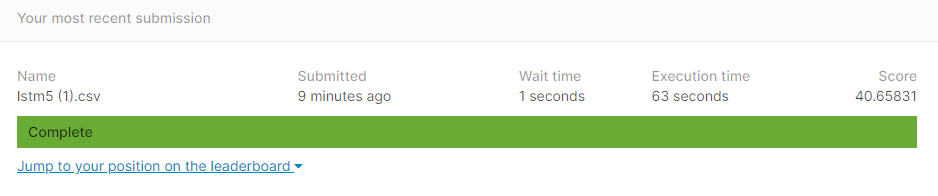

In [45]:
from prettytable import PrettyTable
x = PrettyTable()
x = PrettyTable(["Sno.","Model", "Kaggle Score"])
x.add_row([4,'XgBoost',179.36])
x.add_row([5,'LSTM+cnn',41.30])
x.add_row([6,'LSTM+embedding',40.65])

print(x)

+------+----------------+--------------+
| Sno. |     Model      | Kaggle Score |
+------+----------------+--------------+
|  4   |    XgBoost     |    179.36    |
|  5   |    LSTM+cnn    |     41.3     |
|  6   | LSTM+embedding |    40.65     |
+------+----------------+--------------+
